# Name:- Yash Bhargava
# Section:- T  RollNo:- 53
# University RollNo:- 2115500160

# House Price Prediction Using Decision Tree

Importing Required Modules

In [122]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Sample DataSet (USA_Housing.csv)

In [124]:
housing = pd.read_csv("/content/drive/MyDrive/USA_Housing.csv")

Converting the data into integer as required by decision tree algorithm

In [125]:
housing['Avg. Area Income'] = housing['Avg. Area Income'].astype(int)
housing['Avg. Area House Age'] = housing['Avg. Area House Age'].astype(int)
housing['Avg. Area Number of Rooms'] = housing['Avg. Area Number of Rooms'].astype(int)
housing['Avg. Area Number of Bedrooms'] = housing['Avg. Area Number of Bedrooms'].astype(int)
housing['Area Population'] = housing['Area Population'].astype(int)
housing['Price'] = housing['Price'].astype(int)

Review of data 

In [126]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545,5,7,4,23086,1059033,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248,6,6,3,40173,1505890,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287,5,8,5,36882,1058987,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345,7,5,3,34310,1260616,USS Barnett\nFPO AP 44820
4,59982,5,7,4,26354,630943,USNS Raymond\nFPO AE 09386


In [127]:
housing.shape

(5000, 7)

Statistical details of data

In [128]:
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5.000000e+03
mean,68582.614400,5.481000,6.492200,3.732400,36163.01500,1.232072e+06
std,10657.985126,1.034144,1.048503,1.225843,9925.64664,3.531176e+05
min,17796.000000,2.000000,3.000000,2.000000,172.00000,1.593800e+04
25%,61480.250000,5.000000,6.000000,3.000000,29403.75000,9.975765e+05
50%,68804.000000,5.000000,7.000000,4.000000,36199.00000,1.232669e+06
75%,75783.000000,6.000000,7.000000,4.000000,42861.00000,1.471210e+06
max,107701.000000,9.000000,10.000000,6.000000,69621.00000,2.469065e+06


# **`Visualization of Data`**

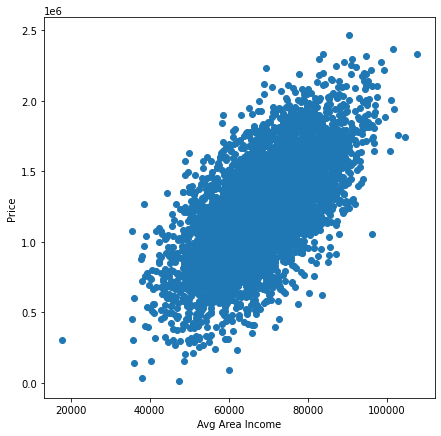

In [129]:
plt.figure(figsize = (7,7))
plt.scatter(housing['Avg. Area Income'], housing['Price'])
plt.xlabel('Avg Area Income')
plt.ylabel('Price')
plt.show()

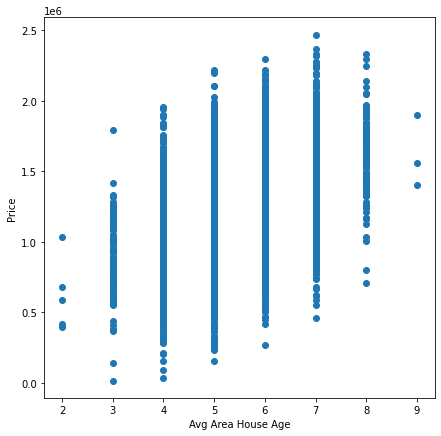

In [130]:
plt.figure(figsize = (7,7))
plt.scatter(housing['Avg. Area House Age'], housing['Price'])
plt.xlabel('Avg Area House Age')
plt.ylabel('Price')
plt.show()

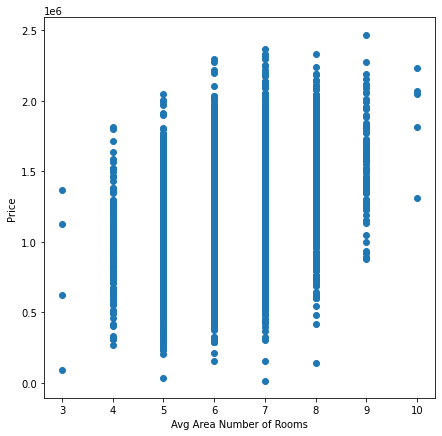

In [131]:
plt.figure(figsize = (7,7))
plt.scatter(housing['Avg. Area Number of Rooms'], housing['Price'])
plt.xlabel('Avg Area Number of Rooms')
plt.ylabel('Price')
plt.show()

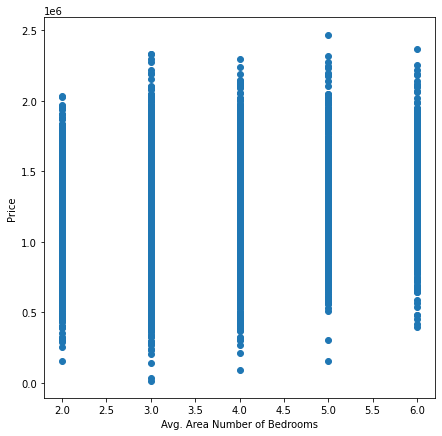

In [132]:
plt.figure(figsize = (7,7))
plt.scatter(housing['Avg. Area Number of Bedrooms'], housing['Price'])
plt.xlabel('Avg. Area Number of Bedrooms')
plt.ylabel('Price')
plt.show()

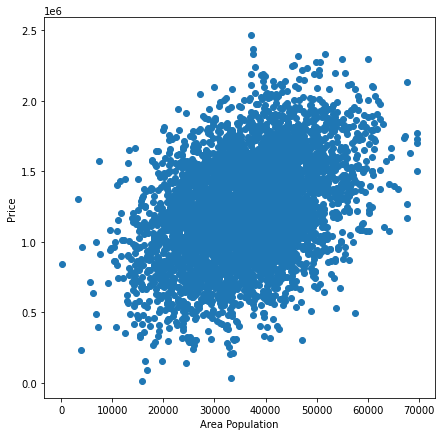

In [133]:
plt.figure(figsize = (7,7))
plt.scatter(housing['Area Population'], housing['Price'])
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.show()

In [134]:
x = housing[['Avg. Area Income',	'Avg. Area House Age',	'Avg. Area Number of Rooms',	'Avg. Area Number of Bedrooms',	'Area Population']]
y = housing[['Price']]

Finding correlation in data with the help of heatmap() and corr() method.

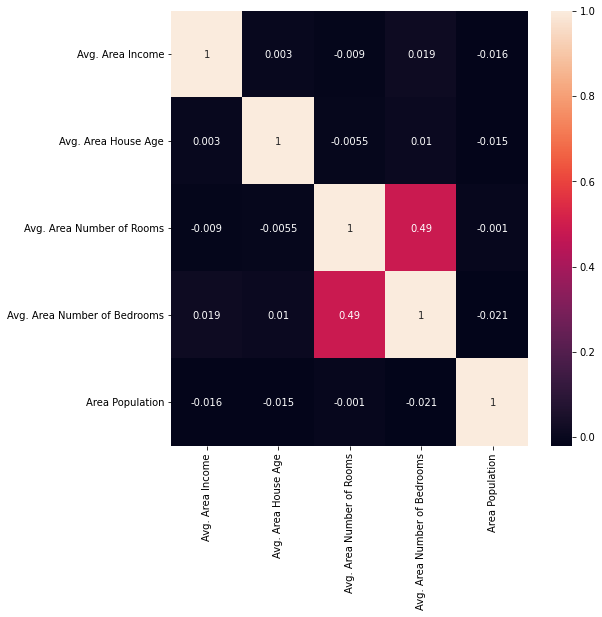

In [135]:
plt.figure(figsize=(8,8))
columns = ['Avg. Area Income',	'Avg. Area House Age',	'Avg. Area Number of Rooms',	'Avg. Area Number of Bedrooms',	'Area Population']
sns.heatmap(housing[columns].corr(),annot=True)
plt.show()

In [136]:
from sklearn.model_selection import train_test_split

Splitting of data into training and testing data

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35)

In [138]:
from sklearn.tree import DecisionTreeClassifier

Creating an object of DecisionTreeClassifier()

In [139]:
dtc = DecisionTreeClassifier()

Training the model

In [140]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

Testing of model on using Testing dataset

In [141]:
y_pred = dtc.predict(x_test)

In [142]:
from sklearn.metrics import r2_score, explained_variance_score

In [143]:
r2_score(y_test, y_pred)

0.6110481199765494

In [144]:
explained_variance_score(y_pred, y_test)

0.590488981819709